In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [62]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [63]:
filename = 'Dataset/Sensor_Discrimination_normalized.csv'
df=pd.read_csv(filename)
# shuffle the DataFrame rows
df = df.sample(frac = 1) #frac = fraction
dataset=df.iloc[:,:-1]
label=df.iloc[:,-1]
print(dataset)
print(label)

            F2        F3        F1       F11        F4        F6       F10  \
1979  0.126909  0.913526  0.844662  0.303723  0.834359  0.528587  0.707078   
1774  0.827807  0.575370  0.365916  0.233688  0.471977  0.031198  0.275226   
28    0.511230  0.531292  0.356317  0.182624  0.417595  0.037246  0.211785   
1405  0.174952  0.968540  0.891283  0.986348  0.989855  0.771853  0.933358   
691   0.438075  0.786339  0.595886  0.198759  0.642774  0.154673  0.370294   
...        ...       ...       ...       ...       ...       ...       ...   
106   0.485348  0.479307  0.226053  0.167961  0.405289 -0.029192  0.183603   
2187  0.219679  0.837147  0.745544  0.178723  0.741227  0.399395  0.320783   
484   0.234439  0.910162  0.753379  0.217021  0.763346  0.414788  0.380836   
1701  0.676791  0.869953  0.816063  0.461702  0.852320  0.242606  0.919616   
1964  0.138139  0.904273  0.779236  0.296809  0.876601  0.572567  0.718185   

            F9        F5      F7     F12       F8  
1979  0.331

In [64]:
dataset_arr=dataset.to_numpy()
# from NecessaryModules.splitData import split_data
X_train,X_comb, y_train,y_comb = train_test_split(dataset_arr, label, test_size=0.4, random_state=42)
print(len(X_train))

1327


In [65]:
X_valid, X_test, y_valid, y_test = train_test_split(X_comb, y_comb, test_size=0.50, random_state=42)
print(len(X_valid))

442


# Encoding

In [66]:
import pickle

# Load the encoder model from the saved file
with open("all_pkl_file/Encoder_3.pkl", "rb") as file: #"rb"= read mode
    encoder = pickle.load(file)

encoder


In [67]:
encoded_X = pd.DataFrame(encoder.predict(dataset))
encoded_X = encoded_X.add_prefix('feature_')

encoded_X_train = pd.DataFrame(encoder.predict(X_train))
encoded_X_train = encoded_X_train.add_prefix('feature_')

encoded_X_valid = pd.DataFrame(encoder.predict(X_valid))
encoded_X_valid = encoded_X_valid.add_prefix('feature_')

encoded_X_test = pd.DataFrame(encoder.predict(X_test))
encoded_X_test = encoded_X_test.add_prefix('feature_')



70/70 [==============================] - 0s 1ms/step


14/14 [==============================] - 0s 802us/step


# reshape the data 

In [68]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler(copy=True).fit(dataset)
encoded_X_n=scaler.transform(dataset)
encoded_X_train_n=scaler.transform(X_train)
encoded_X_valid_n=scaler.transform(X_valid)
encoded_X_test_n=scaler.transform(X_test)
encoded_X_train_n

array([[ 5.34759358e-01,  9.06123822e-01,  8.34084231e-01, ...,
         1.91128373e-01,  2.79050000e-01,  2.25020851e-01],
       [ 8.20320856e-01,  6.08681023e-01,  3.70421156e-01, ...,
         9.48078496e-02,  2.44450000e-01,  1.39449541e-01],
       [ 3.91871658e-01,  5.42395693e-01,  2.54456415e-01, ...,
         9.48078496e-02,  2.67150000e-01,  1.42535446e-01],
       ...,
       [ 4.59037433e-01,  8.59690444e-01,  5.68658178e-01, ...,
         2.40556010e-01,  2.67100000e-01,  3.04420350e-01],
       [ 2.20534759e-01,  9.88223419e-01,  9.17727718e-01, ...,
         4.63614064e-01,  3.36900000e-02,  4.28607173e-01],
       [ 3.39465241e-01,  8.21332436e-01,  7.36924584e-01, ...,
         1.45707277e-01, -3.66200000e-04,  2.02585488e-01]])

In [69]:
encoded_X_valid_n.shape

(442, 12)

In [70]:
X_train_arr=encoded_X_train_n.reshape(encoded_X_train_n.shape[0],encoded_X_train_n.shape[1],1)
X_train_arr.shape

(1327, 12, 1)

In [71]:
# X_valid_arr=compressed_dataset_X_valid.to_numpy()
X_valid_arr=encoded_X_valid_n.reshape(encoded_X_valid_n.shape[0],encoded_X_valid_n.shape[1],1)
X_valid_arr.shape

(442, 12, 1)

In [72]:
X_test_arr=encoded_X_test_n.reshape(encoded_X_test_n.shape[0],encoded_X_test_n.shape[1],1)
X_test_arr.shape

(443, 12, 1)

In [73]:
# for "y"

y_train_arr=np.array(y_train)
y_train_arr=y_train_arr.reshape(y_train_arr.shape[0],1)

y_valid_arr=np.array(y_valid)
y_valid_arr=y_valid_arr.reshape(y_valid_arr.shape[0],1)

y_test_arr=np.array(y_test)
y_test_arr=y_test_arr.reshape(y_test_arr.shape[0],1)

In [74]:
y_test_arr.shape

(443, 1)

# one hot encode

In [75]:
from keras.utils import to_categorical
# one hot encoding
y_train_arr = to_categorical(y_train, 3)
y_valid_arr = to_categorical(y_valid, 3)
y_test_arr = to_categorical(y_test, 3)

In [76]:
y_test_arr

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# model

In [77]:

# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D,LSTM


In [78]:
import tensorflow as tf
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [79]:
# Global value
verbose, epochs, batch_size = 1, 100, 40


In [80]:
# summarize scores
def summarize_results(scores):
 print(scores)
 m, s = mean(scores), std(scores)
 print('Test Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 

# Accuracy measure

**tunned model**

In [81]:
# fit and evaluate a model
import optuna
from matplotlib import pyplot as plt

def optimize_model2(trainX, trainy,validX,validy):
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 3
    def objective_model2(trial):
    # Define hyperparameters to be tuned
     
     filters = trial.suggest_int('filters', 32, 128)
    #  kernel_size = trial.suggest_int('kernel_size', 2, 5)
     dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    #  dense_units = trial.suggest_int('dense_units', 50, 200)
    #  pool_size=trial.suggest_int('pool_size',2,4)
     
     
     # Build the CNN model
     model = Sequential()
     model.add(Conv1D(filters=filters, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
    #  model.add(MaxPooling1D(pool_size=pool_size))
     model.add(LSTM(units=filters)) # remember the important features
     model.add(Dense(100, activation='relu'))
     model.add(Dense(filters, activation='relu')) 
     model.add(Dropout(dropout_rate))#for regularization
     model.add(Dense(n_outputs, activation='softmax'))
 
     # Compile the model
     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
     # Fit the model
     history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs,callbacks=[callback],batch_size=batch_size, verbose=verbose)
    
    # Return the validation accuracy as the objective value
     return history.history['val_accuracy'][-1]
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_model2, n_trials= 10, 
                   #timeout=600
                   )#The maximum time (in seconds) allowed for the optimization process to run.
    # Get the best hyperparameters
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)
   

    return best_params
 



In [82]:

best_params=optimize_model2(X_train_arr, y_train_arr, X_valid_arr, y_valid_arr)

[I 2024-02-12 16:02:01,448] A new study created in memory with name: no-name-6801af5c-ae1f-4482-8bd9-9d6b26ffa297


Epoch 1/100
34/34 [==============================] - 3s 27ms/step - loss: 1.0746 - accuracy: 0.4205 - val_loss: 1.0294 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 0.9227 - accuracy: 0.5049 - val_loss: 0.7979 - val_accuracy: 0.5837
Epoch 3/100
34/34 [==============================] - 0s 13ms/step - loss: 0.7077 - accuracy: 0.6541 - val_loss: 0.7032 - val_accuracy: 0.6267
Epoch 4/100
34/34 [==============================] - 0s 13ms/step - loss: 0.5765 - accuracy: 0.7129 - val_loss: 0.5694 - val_accuracy: 0.7036
Epoch 5/100
34/34 [==============================] - 0s 12ms/step - loss: 0.4981 - accuracy: 0.7573 - val_loss: 0.4942 - val_accuracy: 0.7421
Epoch 6/100
34/34 [==============================] - 0s 13ms/step - loss: 0.4646 - accuracy: 0.7694 - val_loss: 0.4560 - val_accuracy: 0.7579
Epoch 7/100
34/34 [==============================] - 0s 13ms/step - loss: 0.4181 - accuracy: 0.7747 - val_loss: 0.4463 - val_accuracy: 0.7805
Epoch 

[I 2024-02-12 16:02:17,145] Trial 0 finished with value: 0.889140248298645 and parameters: {'filters': 86, 'dropout_rate': 0.41525430036380906}. Best is trial 0 with value: 0.889140248298645.


Epoch 1/100
34/34 [==============================] - 3s 27ms/step - loss: 1.0682 - accuracy: 0.4197 - val_loss: 1.0168 - val_accuracy: 0.4434
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 0.8454 - accuracy: 0.5554 - val_loss: 0.7779 - val_accuracy: 0.6199
Epoch 3/100
34/34 [==============================] - 0s 13ms/step - loss: 0.5820 - accuracy: 0.7076 - val_loss: 0.5687 - val_accuracy: 0.7262
Epoch 4/100
34/34 [==============================] - 0s 12ms/step - loss: 0.5147 - accuracy: 0.7460 - val_loss: 0.5843 - val_accuracy: 0.6765
Epoch 5/100
34/34 [==============================] - 1s 16ms/step - loss: 0.5011 - accuracy: 0.7378 - val_loss: 0.4813 - val_accuracy: 0.7692
Epoch 6/100
34/34 [==============================] - 0s 12ms/step - loss: 0.4613 - accuracy: 0.7807 - val_loss: 0.7729 - val_accuracy: 0.6991
Epoch 7/100
34/34 [==============================] - 0s 13ms/step - loss: 0.4151 - accuracy: 0.7905 - val_loss: 0.4624 - val_accuracy: 0.7624
Epoch 

[I 2024-02-12 16:02:29,953] Trial 1 finished with value: 0.9773755669593811 and parameters: {'filters': 104, 'dropout_rate': 0.42914653679935755}. Best is trial 1 with value: 0.9773755669593811.


Epoch 1/100
34/34 [==============================] - 3s 23ms/step - loss: 1.0720 - accuracy: 0.4235 - val_loss: 1.0348 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.9729 - accuracy: 0.4635 - val_loss: 0.8700 - val_accuracy: 0.5362
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 0.7541 - accuracy: 0.6368 - val_loss: 0.6938 - val_accuracy: 0.6448
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 0.6242 - accuracy: 0.7257 - val_loss: 0.5857 - val_accuracy: 0.7376
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 0.5623 - accuracy: 0.7687 - val_loss: 0.7009 - val_accuracy: 0.7172
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 0.5377 - accuracy: 0.7935 - val_loss: 0.4924 - val_accuracy: 0.8032
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 0.4412 - accuracy: 0.8267 - val_loss: 0.4538 - val_accuracy: 0.8054
Epoch 8/100


[I 2024-02-12 16:02:41,075] Trial 2 finished with value: 0.9864253401756287 and parameters: {'filters': 47, 'dropout_rate': 0.16735527524819632}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 3s 22ms/step - loss: 1.0825 - accuracy: 0.4288 - val_loss: 1.0645 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 1.0290 - accuracy: 0.4393 - val_loss: 0.9636 - val_accuracy: 0.5158
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 0.8489 - accuracy: 0.5682 - val_loss: 0.7586 - val_accuracy: 0.6176
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 0.6684 - accuracy: 0.6888 - val_loss: 0.5854 - val_accuracy: 0.6855
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.6147 - accuracy: 0.7038 - val_loss: 0.5646 - val_accuracy: 0.7353
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 0.5359 - accuracy: 0.7370 - val_loss: 1.2184 - val_accuracy: 0.5837
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 0.7410 - accuracy: 0.6534 - val_loss: 0.6539 - val_accuracy: 0.7104
Epoch 8/100


[I 2024-02-12 16:02:56,157] Trial 3 finished with value: 0.959276020526886 and parameters: {'filters': 45, 'dropout_rate': 0.4928461329897421}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 3s 28ms/step - loss: 1.0642 - accuracy: 0.4115 - val_loss: 0.9764 - val_accuracy: 0.4796
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 0.7647 - accuracy: 0.6172 - val_loss: 0.7051 - val_accuracy: 0.6199
Epoch 3/100
34/34 [==============================] - 0s 15ms/step - loss: 0.5703 - accuracy: 0.7438 - val_loss: 0.6368 - val_accuracy: 0.6584
Epoch 4/100
34/34 [==============================] - 1s 15ms/step - loss: 0.5752 - accuracy: 0.7483 - val_loss: 0.5313 - val_accuracy: 0.7534
Epoch 5/100
34/34 [==============================] - 0s 15ms/step - loss: 0.4581 - accuracy: 0.7837 - val_loss: 0.4675 - val_accuracy: 0.7964
Epoch 6/100
34/34 [==============================] - 1s 15ms/step - loss: 0.4192 - accuracy: 0.8018 - val_loss: 0.6906 - val_accuracy: 0.7014
Epoch 7/100
34/34 [==============================] - 0s 14ms/step - loss: 0.5513 - accuracy: 0.7626 - val_loss: 0.4760 - val_accuracy: 0.7602
Epoch 

[I 2024-02-12 16:03:14,287] Trial 4 finished with value: 0.9366515874862671 and parameters: {'filters': 102, 'dropout_rate': 0.24107636485704692}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 3s 23ms/step - loss: 1.0723 - accuracy: 0.4333 - val_loss: 1.0350 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 0.9295 - accuracy: 0.5087 - val_loss: 0.8063 - val_accuracy: 0.5973
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 0.6910 - accuracy: 0.6616 - val_loss: 0.6413 - val_accuracy: 0.6652
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 0.5881 - accuracy: 0.7280 - val_loss: 0.6521 - val_accuracy: 0.6900
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.5850 - accuracy: 0.7204 - val_loss: 0.5539 - val_accuracy: 0.7647
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 0.4964 - accuracy: 0.7664 - val_loss: 0.5105 - val_accuracy: 0.7760
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 0.4960 - accuracy: 0.7589 - val_loss: 0.5225 - val_accuracy: 0.7195
Epoch 8/100

[I 2024-02-12 16:03:31,883] Trial 5 finished with value: 0.9457013607025146 and parameters: {'filters': 46, 'dropout_rate': 0.3872870354400929}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 3s 22ms/step - loss: 1.0626 - accuracy: 0.4326 - val_loss: 1.0248 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 0.9046 - accuracy: 0.4898 - val_loss: 0.7446 - val_accuracy: 0.6629
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 0.6705 - accuracy: 0.6707 - val_loss: 0.6428 - val_accuracy: 0.7285
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 0.5359 - accuracy: 0.7332 - val_loss: 0.6118 - val_accuracy: 0.7376
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 0.5126 - accuracy: 0.7408 - val_loss: 0.4946 - val_accuracy: 0.7873
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 0.4347 - accuracy: 0.7815 - val_loss: 0.4670 - val_accuracy: 0.7738
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 0.4071 - accuracy: 0.7852 - val_loss: 0.4854 - val_accuracy: 0.7466
Epoch 8/100


[I 2024-02-12 16:03:42,926] Trial 6 finished with value: 0.9570135474205017 and parameters: {'filters': 39, 'dropout_rate': 0.1422012627099743}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 4s 38ms/step - loss: 1.0638 - accuracy: 0.4137 - val_loss: 1.0143 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 1s 22ms/step - loss: 0.9159 - accuracy: 0.4876 - val_loss: 0.7266 - val_accuracy: 0.7421
Epoch 3/100
34/34 [==============================] - 1s 23ms/step - loss: 0.6706 - accuracy: 0.6971 - val_loss: 0.5876 - val_accuracy: 0.7262
Epoch 4/100
34/34 [==============================] - 1s 23ms/step - loss: 0.5063 - accuracy: 0.7536 - val_loss: 0.6508 - val_accuracy: 0.6629
Epoch 5/100
34/34 [==============================] - 1s 23ms/step - loss: 0.4758 - accuracy: 0.7694 - val_loss: 0.4343 - val_accuracy: 0.7919
Epoch 6/100
34/34 [==============================] - 1s 21ms/step - loss: 0.4896 - accuracy: 0.7573 - val_loss: 0.5992 - val_accuracy: 0.6742
Epoch 7/100
34/34 [==============================] - 1s 23ms/step - loss: 0.4118 - accuracy: 0.7890 - val_loss: 0.3822 - val_accuracy: 0.8032
Epoch 

[I 2024-02-12 16:04:02,051] Trial 7 finished with value: 0.9117646813392639 and parameters: {'filters': 120, 'dropout_rate': 0.4361329648996156}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 3s 27ms/step - loss: 1.0662 - accuracy: 0.4250 - val_loss: 1.0188 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 13ms/step - loss: 0.8929 - accuracy: 0.4951 - val_loss: 0.8969 - val_accuracy: 0.4593
Epoch 3/100
34/34 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.6594 - val_loss: 0.5949 - val_accuracy: 0.6471
Epoch 4/100
34/34 [==============================] - 0s 13ms/step - loss: 0.4979 - accuracy: 0.7347 - val_loss: 0.4752 - val_accuracy: 0.7443
Epoch 5/100
34/34 [==============================] - 0s 14ms/step - loss: 0.4449 - accuracy: 0.7626 - val_loss: 0.4421 - val_accuracy: 0.7964
Epoch 6/100
34/34 [==============================] - 0s 13ms/step - loss: 0.3896 - accuracy: 0.7973 - val_loss: 0.4098 - val_accuracy: 0.8281
Epoch 7/100
34/34 [==============================] - 0s 14ms/step - loss: 0.3721 - accuracy: 0.8116 - val_loss: 0.4613 - val_accuracy: 0.7760
Epoch 

[I 2024-02-12 16:04:17,622] Trial 8 finished with value: 0.9638009071350098 and parameters: {'filters': 69, 'dropout_rate': 0.23326855045859995}. Best is trial 2 with value: 0.9864253401756287.


Epoch 1/100
34/34 [==============================] - 3s 32ms/step - loss: 1.0398 - accuracy: 0.4265 - val_loss: 0.9519 - val_accuracy: 0.4525
Epoch 2/100
34/34 [==============================] - 1s 17ms/step - loss: 0.7945 - accuracy: 0.5908 - val_loss: 0.8613 - val_accuracy: 0.6403
Epoch 3/100
34/34 [==============================] - 1s 18ms/step - loss: 0.6827 - accuracy: 0.6677 - val_loss: 0.6197 - val_accuracy: 0.7217
Epoch 4/100
34/34 [==============================] - 1s 18ms/step - loss: 0.5056 - accuracy: 0.7460 - val_loss: 0.6273 - val_accuracy: 0.6878
Epoch 5/100
34/34 [==============================] - 1s 18ms/step - loss: 0.5313 - accuracy: 0.7265 - val_loss: 0.4252 - val_accuracy: 0.8009
Epoch 6/100
34/34 [==============================] - 1s 18ms/step - loss: 0.3770 - accuracy: 0.8101 - val_loss: 0.5627 - val_accuracy: 0.7149
Epoch 7/100
34/34 [==============================] - 1s 17ms/step - loss: 0.3751 - accuracy: 0.8357 - val_loss: 0.3170 - val_accuracy: 0.8710
Epoch 

[I 2024-02-12 16:04:32,410] Trial 9 finished with value: 0.9321267008781433 and parameters: {'filters': 127, 'dropout_rate': 0.4753125586777608}. Best is trial 2 with value: 0.9864253401756287.


Best Hyperparameters: {'filters': 47, 'dropout_rate': 0.16735527524819632}


In [83]:
best_params

{'filters': 47, 'dropout_rate': 0.16735527524819632}

In [84]:
# fit and evaluate a model
def evaluate_model_1(trainX, trainy,validX,validy, testX, testy):
#  verbose, epochs, batch_size = 1, 1500, 100
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 3
 model = Sequential()
 model.add(Conv1D(filters=best_params['filters'], kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#  model.add(MaxPooling1D(pool_size=best_params['pool_size']))
 model.add(LSTM(units=best_params['filters']))
 model.add(Dense(100, activation='relu'))
 model.add(Dense(best_params['filters'], activation='relu'))
 model.add(Dropout(best_params['dropout_rate']))
 model.add(Dense(n_outputs, activation='softmax')) # "softmax" for multi-class
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 history=model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs, batch_size=batch_size,callbacks=[callback], verbose=verbose) 
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 # '_,'-->a variable is being used for a specific purpose, but its value is not of interest or not used in the subsequent code.
 return accuracy,history,model

In [85]:

score_1,history_1,model_1= evaluate_model_1(X_train_arr, y_train_arr, X_valid_arr, y_valid_arr, X_test_arr, y_test_arr)
score_1 = score_1 * 100.0
summarize_results(score_1)

Epoch 1/100
34/34 [==============================] - 3s 23ms/step - loss: 1.0819 - accuracy: 0.4303 - val_loss: 1.0525 - val_accuracy: 0.4367
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.9947 - accuracy: 0.4665 - val_loss: 0.8861 - val_accuracy: 0.4751
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 0.8324 - accuracy: 0.6134 - val_loss: 0.7377 - val_accuracy: 0.6833
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 0.6487 - accuracy: 0.7031 - val_loss: 0.6922 - val_accuracy: 0.6403
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.5995 - accuracy: 0.7272 - val_loss: 0.5936 - val_accuracy: 0.7624
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 0.5235 - accuracy: 0.7656 - val_loss: 0.5759 - val_accuracy: 0.7828
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 0.5224 - accuracy: 0.8026 - val_loss: 0.4723 - val_accuracy: 0.7919
Epoch 8/100


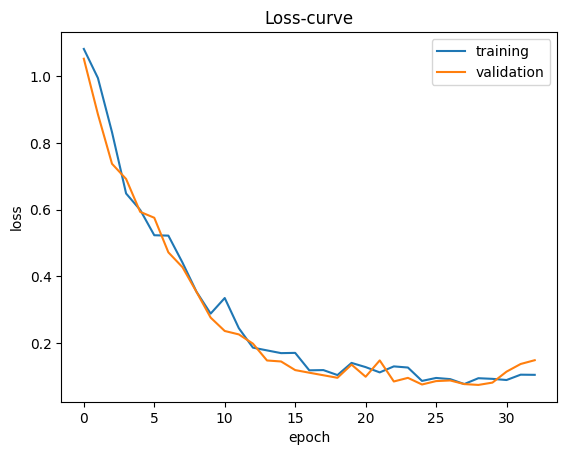

In [86]:
# plot loss-curve_2
pyplot.plot(history_1.history['loss'], label='training')
pyplot.plot(history_1.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss-curve')
pyplot.legend()
pyplot.show()

14/14 [==============================] - 1s 3ms/step
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


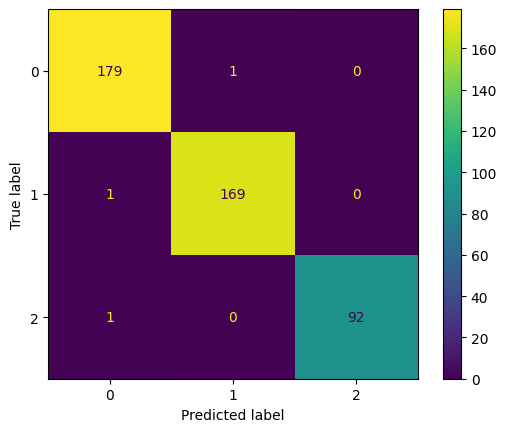

In [87]:
 #confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


predictions=model_1.predict(X_test_arr)
print(y_test_arr)


for i in range(len(predictions)):
    for j in range(len(predictions[0])):
        if predictions[i][j]==max(predictions[i]):
            predictions[i][j]=1
        else: predictions[i][j]=0

# reverse one-hot encoding for fit into confusion matrix
y_test_cm=y_test_arr.argmax(axis=1)
# print(y_test_cm)
predictions_cm=predictions.argmax(axis=1)
# print(predictions_cm)

cm = confusion_matrix(y_test_cm, predictions_cm, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1,2])
disp.plot()
plt.show()


# ROC curve

In [88]:
# # Load the encoder model from the saved file
# with open("../all_pkl_file/all_tuned_model/PCA_model2_fitted_2.pkl", "rb") as file: #"rb"= read mode
#     model = pickle.load(file)

# model

In [89]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

In [90]:
# predictions=model.predict(X_test_arr)
# for i in range(len(predictions)):
#     for j in range(len(predictions[0])):
#         if predictions[i][j]==max(predictions[i]):
#             predictions[i][j]=1
#         else: predictions[i][j]=0
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(7):
#     fpr[i], tpr[i], _ = roc_curve(y_test_arr[:, i], predictions[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

In [91]:
# # Plot ROC curve for each class
# plt.figure()
# for i in range(7):
#     plt.plot(fpr[i], tpr[i], label=f'class {i}(area = {roc_auc[i]:0.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()